<a href="https://colab.research.google.com/github/ArdineJ/ArdineJ/blob/main/routie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Setup

## Installation

In [ ]:
pip install pandas numpy scikit-learn matplotlib gspread google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

## Impot Utils


In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gspread
from googleapiclient.discovery import build
from google.oauth2 import service_account
from scipy.spatial.distance import euclidean

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## G Sheet Setup


In [ ]:
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]
SERVICE_ACCOUNT_FILE = '/content/drive/MyDrive/Colab/credentials.json'

creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# The ID spreadsheet.
SPREADSHEET_ID = "10ld6ipj-9RjSoyyZSMxMyudEjQZ_ooMdzECL8TDl70E"

service = build("sheets", "v4", credentials=creds)

sheet = service.spreadsheets()
creds = None
creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# The ID spreadsheet.
SPREADSHEET_ID = "10ld6ipj-9RjSoyyZSMxMyudEjQZ_ooMdzECL8TDl70E"
service = build("sheets", "v4", credentials=creds)
sheet = service.spreadsheets()

# Function to append data to Google Sheets
def send_to_gsheets(data, range_data):
    # Clear the existing content in the sheet
    sheet.values().clear(spreadsheetId=SPREADSHEET_ID, range=range_data).execute()

    # Append the clustered data
    sheet.values().append(
        spreadsheetId=SPREADSHEET_ID,
        range=range_data,
        valueInputOption='RAW',
        body=dict(values=data)
    ).execute()


## Define GA Function

In [ ]:
# def create_route(num_points, start_index=0):
#     route = list(range(num_points))
#     random.shuffle(route)
#     route.remove(start_index)
#     route.insert(0, start_index)
#     route.append(start_index)  # Ensure the route is a round trip
#     return route

# # Function to calculate distance of a route
# def calculate_distance(route, distances_matrix):
#     total_distance = 0
#     for i in range(len(route) - 1):
#         total_distance += distances_matrix[route[i]][route[i + 1]]
#     return total_distance

# # Function to mutate a route
# def mutate(route, mutation_rate=0.01, start_index=0):
#     for swapped in range(1, len(route) - 1):  # Exclude the start/end point
#         if random.random() < mutation_rate:
#             swap_with = random.randint(1, len(route) - 2)  # Exclude the start/end point
#             route[swapped], route[swap_with] = route[swap_with], route[swapped]
#     return route

# # Function to perform crossover between two parents
# def crossover(parent1, parent2, start_index=0):
#     start_pos = int(random.random() * len(parent1))
#     end_pos = int(random.random() * len(parent1))

#     child_p1 = []
#     for i in range(min(start_pos, end_pos), max(start_pos, end_pos)):
#         child_p1.append(parent1[i])

#     child = [item for item in parent2 if item not in child_p1]

#     if not child_p1:  # If child_p1 is empty, avoid index error
#         return child + [child[0]]

#     child_route = child_p1 + child
#     child_route.append(child_route[0])  # Ensure the route is a round trip
#     return child_route

# # Genetic algorithm to find the best route
# def genetic_algorithm(distances_matrix, start_index=0, num_generations=500, population_size=100, mutation_rate=0.01):
#     num_points = len(distances_matrix)
#     population = [create_route(num_points, start_index) for _ in range(population_size)]

#     for _ in range(num_generations):
#         population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
#         next_generation = population[:10]  # Elitism
#         for _ in range(population_size - 10):
#             parent1 = random.choice(population[:50])
#             parent2 = random.choice(population[:50])
#             child = crossover(parent1, parent2, start_index)
#             next_generation.append(mutate(child, mutation_rate, start_index))
#         population = next_generation

#     best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
#     best_distance = calculate_distance(best_route, distances_matrix)
#     return best_route, best_distance

# Load the Data


## Pre Process Data


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab/deliverytime.csv")

# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Remove rows with missing values
data.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)
# Remove rows with latitude and longitude values less than 1.0 and 0.0 respectively
data = data[(data['Delivery_location_latitude'] >= 1.0) & (data['Delivery_location_longitude'] >= 0.0)]
# Reduce the data size
data = data.iloc[:100] #RANDOM DATA SELECT BIAR ADIL
data = data[['Delivery_location_latitude', 'Delivery_location_longitude']]

# Display the first few rows of the cleaned data
print("\nCleaned data:")
print(data.head())

Missing values before cleaning:
ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

Number of duplicate rows: 0

Cleaned data:
   Delivery_location_latitude  Delivery_location_longitude
0                   22.765049                    75.912471
1                   13.043041                    77.813237
2                   12.924264                    77.688400
3                   11.053669                    77.026494
4                   13.012793                    80.289982


## Clustering with K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Start Long: 82.550674555 , Start Lat: 15.459792


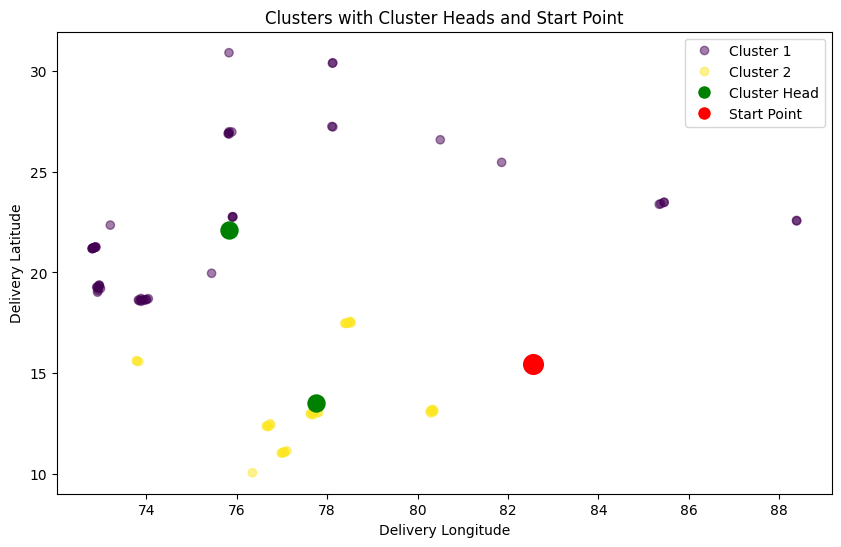


Data with Cluster Labels:
    Delivery_location_latitude  Delivery_location_longitude  Cluster  Id
0                    22.765049                    75.912471        1   0
1                    13.043041                    77.813237        2   1
2                    12.924264                    77.688400        2   2
3                    11.053669                    77.026494        2   3
4                    13.012793                    80.289982        2   4
..                         ...                          ...      ...  ..
95                   13.069166                    77.730709        2  95
96                   19.104237                    72.935553        1  96
97                   12.414747                    76.755861        2  97
98                   21.195975                    72.815503        1  98
99                   11.130762                    77.111876        2  99

[100 rows x 4 columns]

Clustered Points (Start Point and Cluster Heads):
   Delivery_location_l

In [ ]:
# For clustering based on geolocation, we'll use 'Delivery_location_latitude' and 'Delivery_location_longitude'
X = data[['Delivery_location_latitude', 'Delivery_location_longitude']]

# Define the number of clusters
num_clusters = 2  # You can adjust this as needed

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_ + 1

# Convert the index to a column and rename it to 'Id'
data.reset_index(drop=True, inplace=True)
data['Id'] = data.index

# Finding Start Point or Point O
# PAKE RATA2 DARI SEMUA CH DARIPADA HANYA MAX TOK
mean_latitude = data['Delivery_location_latitude'].mean()
mean_longitude = data['Delivery_location_longitude'].mean()
max_latitude_point = data.loc[data['Delivery_location_latitude'].idxmax()]
max_longitude_point = data.loc[data['Delivery_location_longitude'].idxmax()]

start_latitude = max_latitude_point['Delivery_location_latitude'] / 2
start_longitude  = (max_longitude_point['Delivery_location_longitude'] + mean_longitude) / 2
start_point = np.array([start_latitude,start_longitude])
print(f"Start Long: {start_longitude } , Start Lat: {start_latitude}")

# Creating Dataframe for Point O and Cluster heads
start_point_data = pd.DataFrame({'Delivery_location_latitude': [start_latitude],
                                'Delivery_location_longitude': [start_longitude],
                                'Desc': 'Point O'})
cluster_heads = pd.DataFrame(kmeans.cluster_centers_, columns=['Delivery_location_latitude', 'Delivery_location_longitude'])
cluster_heads['Desc'] = ['Cluster Head'] * len(cluster_heads)

# Combine the start point and cluster heads into a single DataFrame
clustered_points = pd.concat([start_point_data, cluster_heads], ignore_index=True)
clustered_points['Id'] = clustered_points.index

# Visualize the clusters with the starting point
plt.figure(figsize=(10, 6))
# Cluster member

# Plot cluster members
scatter = plt.scatter(data['Delivery_location_longitude'], data['Delivery_location_latitude'], c=data['Cluster'], cmap='viridis', alpha=0.5)
# Plot cluster heads
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='o', c='green', s=150, label='Cluster Head')
# Plot the start point
plt.scatter(start_longitude , start_latitude, marker='o', c='red', s=200, label='Start Point')

# Create a legend for the clusters
handles, labels = scatter.legend_elements()
legend_labels = [f'Cluster {i+1}' for i in range(num_clusters)]
plt.legend(handles + [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster Head'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Start Point')],
            legend_labels + ['Cluster Head', 'Start Point'])

plt.xlabel('Delivery Longitude')
plt.ylabel('Delivery Latitude')
plt.title('Clusters with Cluster Heads and Start Point')
plt.show()

# Display the first few rows of the data with cluster labels
print("\nData with Cluster Labels:")
print(data)

# Display the clustered points (start point and cluster heads)
print("\nClustered Points (Start Point and Cluster Heads):")
print(clustered_points)



# Group data by cluster
clustered_data_group_Ids = data.groupby('Cluster')['Id'].apply(list)

# Print IDs for each cluster
for cluster, ids in clustered_data_group_Ids.items():
        print(f"Cluster {cluster}: {ids}")



### Send The Data to Sheet


In [ ]:
# Add the start point to the data DataFrame with ID 2000
# data.loc[len(data)] = [ start_latitude, start_longitude,0,2000]

# Display the first few rows of the updated data DataFrame
print("\nUpdated Data with Cluster Labels and Start Point:")
print(data)

# Reorder columns
data = data[['Id', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Cluster']]
clustered_points = clustered_points[['Id', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Desc']]

data_values = data.values.tolist()
clustered_points_values = clustered_points.values.tolist()

print(data_values)
print(clustered_points_values)


send_to_gsheets(data_values, 'data!B2:E')
send_to_gsheets(clustered_points_values, 'data!G2:J')

print("Clustered data saved to Google Sheets {https://docs.google.com/spreadsheets/d/10ld6ipj-9RjSoyyZSMxMyudEjQZ_ooMdzECL8TDl70E/edit#gid=911707690}",)




Updated Data with Cluster Labels and Start Point:
    Delivery_location_latitude  Delivery_location_longitude  Cluster  Id
0                    22.765049                    75.912471        1   0
1                    13.043041                    77.813237        2   1
2                    12.924264                    77.688400        2   2
3                    11.053669                    77.026494        2   3
4                    13.012793                    80.289982        2   4
..                         ...                          ...      ...  ..
95                   13.069166                    77.730709        2  95
96                   19.104237                    72.935553        1  96
97                   12.414747                    76.755861        2  97
98                   21.195975                    72.815503        1  98
99                   11.130762                    77.111876        2  99

[100 rows x 4 columns]
[[0.0, 22.765049, 75.912471, 1.0], [1.0, 13.04304

## Calculate Distances


In [ ]:
# # Calculate distances from the start point to each cluster head
# distances_O_to_head = [euclidean(start_point, head) for head in kmeans.cluster_centers_]

# # Calculate distances from each cluster head to the members of its cluster
# distance_head_to_members = {}
# for cluster_label in range(num_clusters):
#     cluster_members = data[data['Cluster'] == cluster_label]
#     cluster_head = kmeans.cluster_centers_[cluster_label]
#     distances = [(index, euclidean(cluster_head, member)) for index, member in cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].iterrows()]
#     distance_head_to_members[cluster_label] = distances

# # Print the distances
# print("\nDistances from Start Point to Each Cluster Head:")
# for i, dist in enumerate(distances_O_to_head):
#     print(f"Distance from Start Point to Cluster Head {i}: {dist:.2f}")

# print("\nDistances from Each Cluster Head to Its Members:")
# for cluster, distances in distance_head_to_members.items():
#     print(f"Cluster {cluster}:")
#     for index, dist in distances:
#         print(f"  Member at index {index}: {dist:.2f}")


### Send Distance to Sheet


In [ ]:
# # #================================================================================================================
# # Convert the index to a column and rename it to 'Id'
# distance_values = [[f"Start to Head {i}"] + [dist] for i, dist in enumerate(distances_O_to_head)]
# for cluster, distances in distance_head_to_members.items():
#     distance_values.extend([[f"Head {cluster} to Member at index {index}"] + [dist] for index, dist in distances])

# # Send distances data to Google Sheets
# send_to_gsheets(distance_values, 'distances!B2:E')

# print("Distances data saved to Google Sheets {https://docs.google.com/spreadsheets/d/10ld6ipj-9RjSoyyZSMxMyudEjQZ_ooMdzECL8TDl70E/edit#gid=911707690}")


In [ ]:
# # Prepare the distance matrix
# # Assuming distances[i][j] represents the distance between point i and point j
# # You need to calculate the distances between each pair of points in the clustered data

# # Initialize a list to store the optimized routes for each cluster
# optimized_routes = []

# # Iterate over each cluster
# for cluster_label in range(num_clusters):
#     # Extract the members of the current cluster
#     cluster_members = data[data['Cluster'] == cluster_label]

#     # Create a distance matrix for the current cluster
#     cluster_distances = [[euclidean(start_point, member) for _, member in cluster_members.iterrows()]]

#     # Apply the genetic algorithm to optimize the route for the current cluster
#     best_route, best_distance = genetic_algorithm_for_tsp(cluster_distances, start_index=0)

#     # Append the optimized route to the list of routes
#     optimized_routes.append(best_route)

# # Concatenate the optimized routes to form the complete route for the MTSP
# complete_route = []
# for route in optimized_routes:
#     complete_route.extend(route[1:])  # Exclude the start point

# # Add the start point to the beginning and end of the complete route
# complete_route.insert(0, clustered_points[0])
# complete_route.append(clustered_points[0])

# # Now, `complete_route` contains the optimized route for the MTSP


# Implementation Algorithm (TSP)

## Genetic  Algorithm

### Trial & Error GA

#### Solve TSP for each cluster #1



Cluster 0
Best Route: [82, 446, 421, 184, 862, 1002, 472, 823, 525, 971, 1070, 1180, 193, 605, 27, 444, 951, 492, 516, 707, 550, 1133, 327, 404, 721, 163, 955, 714, 794, 9, 816, 176, 168, 240, 913, 218, 95, 864, 477, 162, 459, 371, 906, 222, 748, 238, 1044, 968, 122, 1022, 158, 1066, 220, 154, 520, 433, 357, 269, 1024, 510, 574, 461, 447, 1132, 661, 599, 335, 312, 292, 725, 370, 101, 188, 454, 1160, 229, 171, 473, 984, 60, 8, 591, 777, 932, 430, 878, 195, 573, 978, 341, 1076, 134, 729, 623, 213, 1096, 33, 349, 916, 301, 663, 396, 893, 264, 829, 659, 411, 1171, 744, 940, 521, 1128, 365, 934, 1052, 481, 879, 500, 1038, 1116, 51, 145, 386, 426, 1176, 186, 350, 88, 391, 470, 407, 814, 164, 438, 44, 417, 543, 178, 536, 855, 1056, 140, 58, 651, 828, 345, 1091, 1053, 889, 1187, 718, 938, 1170, 939, 13, 1068, 571, 945, 937, 30, 857, 1156, 50, 113, 1185, 1025, 884, 336, 776, 645, 518, 258, 324, 467, 1077, 923, 1144, 958, 64, 850, 1188, 56, 73, 665, 559, 1159, 280, 494, 535, 621, 429, 1088, 118

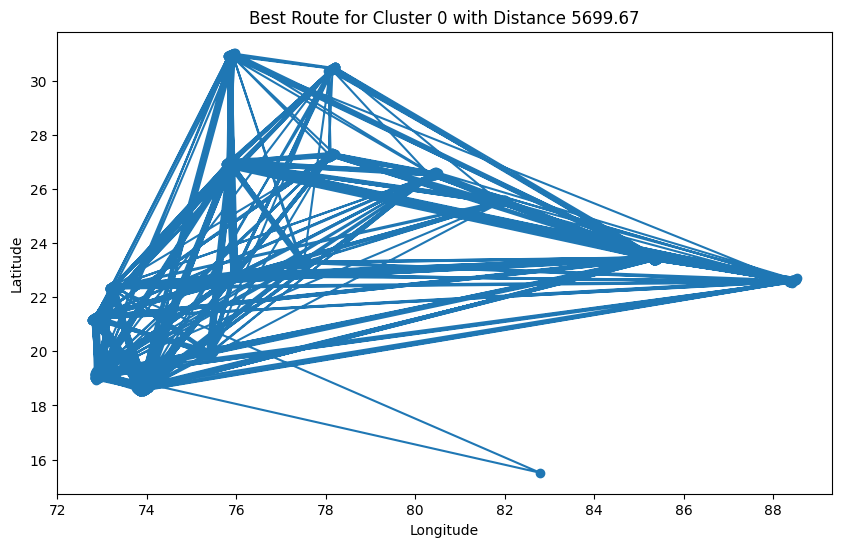


Cluster 1
Best Route: [186, 64, 30, 382, 53, 425, 29, 243, 591, 380, 767, 763, 582, 12, 33, 576, 67, 535, 145, 14, 409, 278, 657, 521, 633, 596, 433, 438, 373, 120, 526, 50, 36, 375, 423, 459, 45, 534, 291, 273, 89, 207, 285, 321, 770, 87, 711, 723, 798, 224, 569, 768, 754, 300, 422, 129, 739, 15, 225, 660, 580, 498, 698, 101, 599, 325, 747, 570, 720, 589, 292, 41, 623, 396, 358, 684, 677, 260, 107, 627, 539, 799, 426, 398, 361, 666, 152, 303, 346, 43, 441, 344, 316, 34, 650, 345, 779, 416, 619, 130, 609, 477, 314, 127, 417, 703, 615, 654, 529, 271, 81, 63, 709, 519, 188, 652, 85, 114, 55, 139, 577, 420, 393, 805, 721, 83, 282, 783, 551, 338, 326, 268, 359, 322, 350, 288, 97, 572, 54, 624, 168, 671, 331, 389, 280, 727, 368, 678, 505, 476, 491, 748, 74, 718, 640, 102, 46, 734, 233, 263, 455, 730, 701, 229, 390, 682, 276, 461, 797, 641, 811, 191, 590, 405, 160, 791, 253, 680, 247, 404, 20, 440, 8, 246, 48, 10, 347, 386, 606, 674, 266, 264, 394, 558, 634, 724, 524, 125, 547, 18, 516, 62,

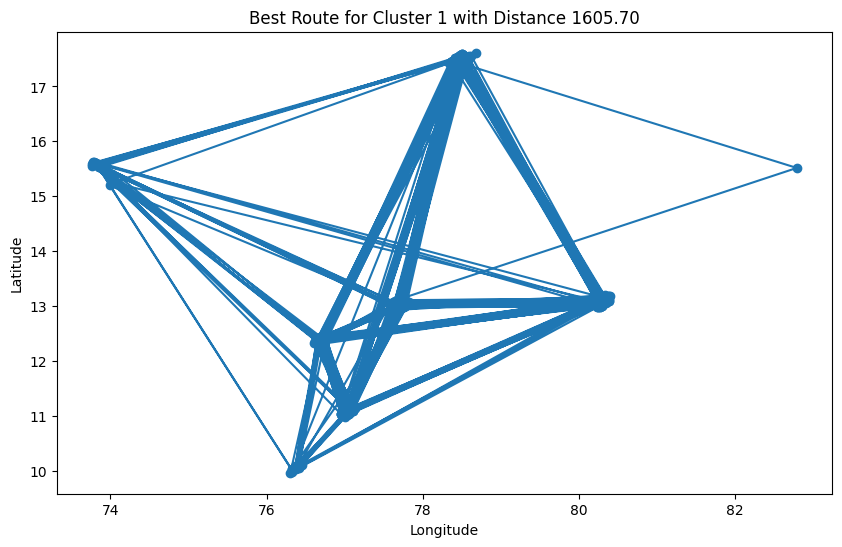

In [ ]:

for cluster_label in range(num_clusters):
    cluster_members = data[data['Cluster'] == cluster_label][['Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    # Calculate distances matrix
    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    # Solve TSP with Genetic Algorithm
    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    # Print the results
    print(f"\nCluster {cluster_label}")
    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    # Plot the best route
    route_points = np.array([points[i] for i in best_route])
    plt.figure(figsize=(10, 6))
    plt.plot(route_points[:, 1], route_points[:, 0], 'o-')
    plt.title(f"Best Route for Cluster {cluster_label} with Distance {best_distance:.2f}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
# Use Genetic algorithm to find tsp from point o to members according to the clusters. after visiting through all the members then back to point o

# CALCULATE DISTANCES
#================================================================================================================
# Calculate distances from each cluster head to the members of its cluster
# distance_head_to_members = {}
# for cluster_label in range(num_clusters):
#     cluster_members = data[data['Cluster'] == cluster_label]
#     cluster_head = kmeans.cluster_centers_[cluster_label]
#     distances = [(index, euclidean(start_point, member)) for index, member in cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].iterrows()]
#     distance_head_to_members[cluster_label] = distances

# print("\nDistances from Each Cluster Head to Its Members:")
# for cluster, distances in distance_head_to_members.items():
#     print(f"Cluster {cluster}:")
#     for index, dist in distances:
#         print(f" Point O to member {index}: {dist:.2f}")








# Calculate distance from the start point to each cluster member

# for index, row in data.iterrows():
#     cluster_member = np.array([row['Delivery_location_latitude'], row['Delivery_location_longitude']])
#     distance = euclidean(start_point - cluster_member)
#     distances.append((index, distance, row['Cluster'], start_point[0], start_point[1], row['Delivery_location_latitude'], row['Delivery_location_longitude']))

# # Group distances by clusters
# cluster_distances = {i: [] for i in range(num_clusters)}
# for index, distance, cluster, start_lat, start_lon, member_lat, member_lon in distances:
#     cluster_distances[cluster].append((index, distance))



# # Display the first few rows of the data with cluster labels
# print("\nData with Cluster Labels:")
# print(data)

# # Display the clustered points (start point and cluster heads)
# print("\nClustered Points (Start Point and Cluster Heads):")
# print(clustered_points)

# # Print the distances grouped by clusters
# for cluster, dists in cluster_distances.items():
#     # print(f"\nDistances for Cluster {cluster}:")
#     for index, distance in dists:
#         print(f"Distance {cluster} from start point to delivery location at index {index}: {distance:.2f}")


#### Solve TSP for each cluster #2



Cluster 0
Best Route: [515, 26, 423, 1060, 485, 17, 808, 293, 971, 16, 833, 114, 419, 1131, 360, 789, 745, 949, 66, 932, 23, 210, 611, 6, 355, 1048, 1030, 288, 1059, 887, 472, 1044, 235, 267, 1118, 840, 766, 584, 323, 600, 102, 159, 478, 701, 36, 964, 474, 129, 494, 815, 1103, 500, 525, 223, 665, 1025, 651, 325, 465, 398, 181, 76, 298, 1052, 705, 962, 342, 657, 630, 814, 1101, 681, 302, 126, 811, 581, 649, 694, 379, 818, 29, 356, 1112, 978, 301, 146, 587, 654, 958, 449, 501, 335, 1037, 608, 1001, 865, 913, 928, 447, 248, 306, 237, 598, 970, 31, 24, 749, 614, 861, 483, 52, 1079, 858, 1000, 260, 282, 1020, 1013, 1049, 344, 469, 1155, 592, 45, 503, 838, 178, 940, 115, 679, 990, 662, 358, 428, 1169, 603, 738, 750, 374, 64, 271, 714, 880, 991, 664, 312, 137, 646, 729, 842, 35, 937, 88, 443, 514, 256, 538, 876, 41, 862, 255, 957, 642, 280, 240, 402, 488, 617, 439, 56, 118, 1064, 796, 430, 183, 334, 1152, 975, 591, 728, 908, 79, 788, 736, 318, 363, 179, 405, 1027, 554, 201, 1119, 799, 124, 7

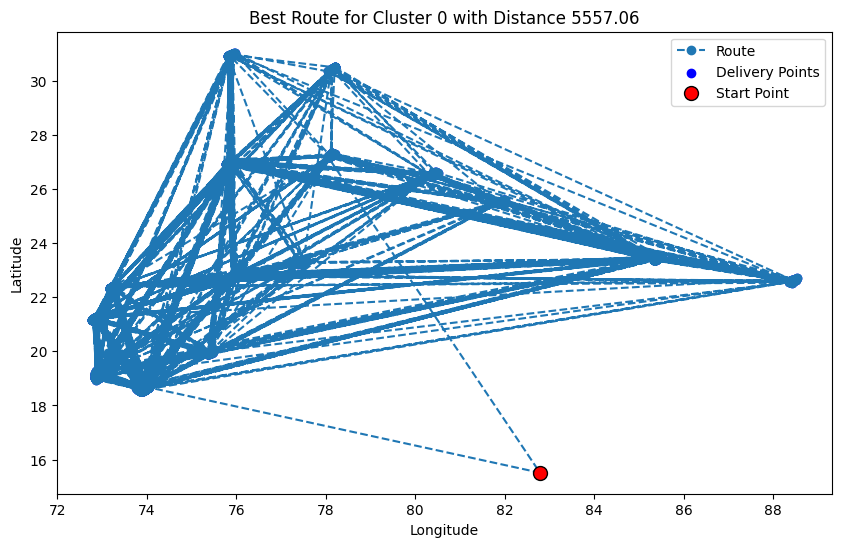


Cluster 1
Best Route: [335, 199, 538, 363, 7, 751, 167, 283, 428, 763, 649, 310, 155, 429, 486, 421, 572, 655, 120, 452, 217, 435, 404, 100, 720, 5, 53, 126, 505, 350, 614, 567, 177, 516, 532, 632, 188, 271, 540, 596, 711, 615, 258, 658, 806, 761, 278, 664, 107, 605, 84, 484, 671, 388, 45, 559, 355, 466, 276, 600, 103, 46, 215, 294, 106, 663, 754, 468, 604, 560, 333, 87, 740, 705, 803, 115, 424, 243, 594, 417, 479, 242, 80, 628, 357, 245, 317, 356, 670, 557, 204, 692, 558, 526, 385, 704, 765, 306, 86, 677, 563, 9, 786, 229, 40, 117, 154, 304, 744, 255, 365, 495, 608, 776, 630, 576, 59, 805, 430, 766, 577, 259, 48, 239, 367, 186, 368, 70, 481, 457, 446, 206, 771, 535, 799, 553, 79, 295, 211, 767, 613, 544, 119, 591, 782, 96, 330, 473, 232, 550, 195, 504, 320, 599, 189, 611, 171, 318, 595, 727, 152, 57, 804, 552, 209, 233, 379, 38, 225, 651, 82, 522, 810, 681, 715, 55, 214, 647, 722, 456, 145, 785, 323, 794, 458, 227, 347, 617, 400, 426, 68, 416, 143, 93, 52, 548, 517, 533, 303, 405, 62

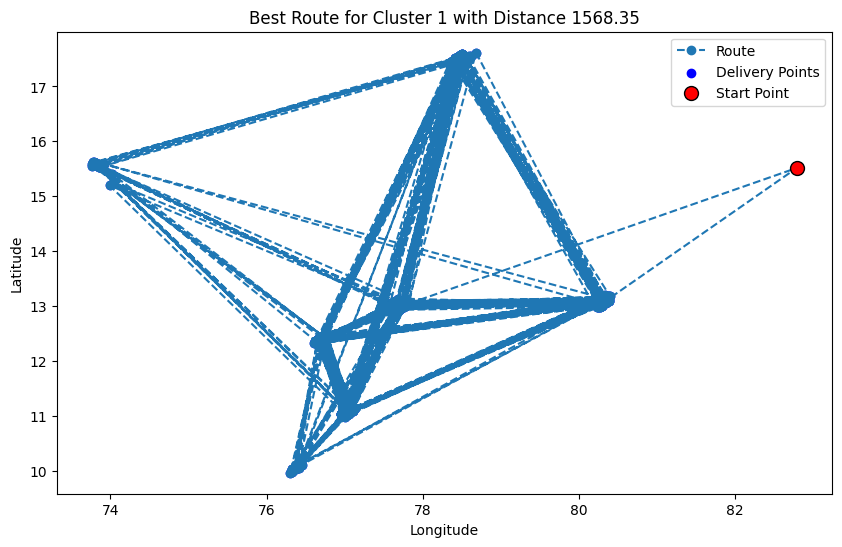

In [ ]:

for cluster_label in range(num_clusters):
    cluster_members = data[data['Cluster'] == cluster_label][['Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    # Calculate distances matrix
    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    # Solve TSP with Genetic Algorithm
    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    # Print the results
    print(f"\nCluster {cluster_label}")
    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    # Plot the best route
    route_points = np.array([points[i] for i in best_route])
    plt.figure(figsize=(10, 6))
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', label='Route')
    plt.scatter(route_points[:, 1], route_points[:, 0], c='blue', label='Cluster Members')
    plt.scatter(start_longitude, start_latitude, c='red', label='Start Point', edgecolors='black', s=100, zorder=5)
    plt.title(f"Best Route for Cluster {cluster_label} with Distance {best_distance:.2f}")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()


#### Solve TSP for each cluster #3



Cluster 1
Best Route: [766, 502, 402, 763, 438, 789, 1070, 407, 1027, 298, 7, 755, 618, 695, 1075, 518, 957, 639, 561, 203, 1144, 454, 570, 463, 101, 813, 289, 1104, 1044, 925, 252, 330, 847, 691, 11, 500, 922, 218, 419, 722, 208, 62, 1156, 319, 1151, 526, 914, 733, 59, 1149, 865, 1140, 1099, 1145, 211, 888, 645, 135, 708, 18, 656, 3, 804, 228, 309, 896, 982, 949, 528, 901, 716, 647, 796, 840, 576, 876, 235, 655, 489, 483, 941, 88, 303, 293, 665, 856, 346, 756, 648, 30, 54, 652, 913, 509, 1121, 1006, 258, 299, 935, 802, 892, 384, 147, 102, 753, 1129, 1103, 621, 785, 232, 416, 24, 1152, 810, 103, 456, 991, 1142, 133, 510, 36, 839, 354, 1072, 262, 282, 277, 163, 889, 361, 260, 829, 16, 657, 515, 764, 671, 191, 801, 417, 371, 167, 714, 368, 715, 1143, 1059, 797, 221, 272, 474, 851, 194, 990, 679, 1155, 534, 450, 301, 706, 288, 322, 980, 874, 954, 846, 799, 442, 199, 41, 641, 773, 822, 1049, 389, 230, 356, 1051, 544, 1092, 546, 597, 677, 255, 436, 491, 1159, 1124, 815, 680, 154, 8, 259, 1

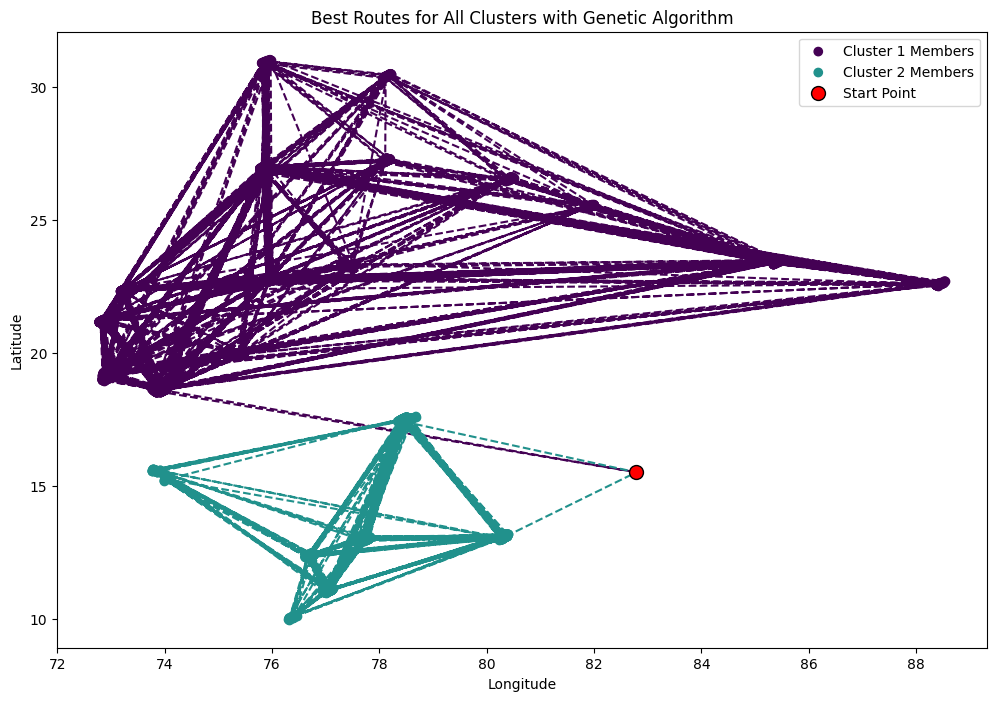

In [ ]:
plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(num_clusters):
    cluster_members = data[data['Cluster'] == cluster_label][['Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    # Calculate distances matrix
    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    # Solve TSP with Genetic Algorithm
    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    # Print the results
    print(f"\nCluster {cluster_label +1}")
    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    # Plot the best route
    route_points = np.array([points[i] for i in best_route])
    color = cmap(cluster_label / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label+1} Members')

# Plot the start point
plt.scatter(start_longitude, start_latitude, c='red', label='Point O', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### Solve TSP for each cluster #4



Cluster 1
Best Route: [1, 0, 1]
Best Distance: 0.0

Cluster 2
Best Route: [1189, 895, 241, 1124, 913, 689, 486, 996, 549, 724, 670, 690, 1013, 263, 152, 688, 906, 222, 490, 1150, 957, 482, 352, 824, 149, 337, 377, 825, 147, 892, 103, 647, 767, 7, 607, 559, 93, 659, 59, 1168, 760, 368, 312, 912, 46, 89, 145, 455, 104, 1080, 554, 483, 439, 1031, 918, 22, 304, 503, 34, 132, 212, 227, 519, 988, 258, 27, 182, 597, 26, 1108, 1109, 78, 538, 985, 201, 721, 631, 1059, 1063, 1116, 917, 1119, 361, 264, 829, 101, 41, 261, 920, 621, 345, 881, 136, 332, 530, 1156, 563, 491, 821, 69, 548, 299, 971, 37, 539, 80, 645, 444, 1026, 513, 1120, 801, 169, 205, 531, 216, 194, 390, 484, 1016, 1044, 192, 828, 1028, 443, 493, 738, 561, 120, 1006, 1184, 1180, 1115, 1011, 297, 1057, 116, 1068, 1149, 452, 6, 668, 395, 959, 840, 969, 1148, 1104, 1007, 1015, 305, 176, 884, 336, 188, 90, 1084, 833, 515, 875, 750, 466, 1111, 657, 298, 1076, 287, 0, 934, 346, 1103, 408, 1079, 468, 1101, 172, 656, 522, 47, 191, 709, 279

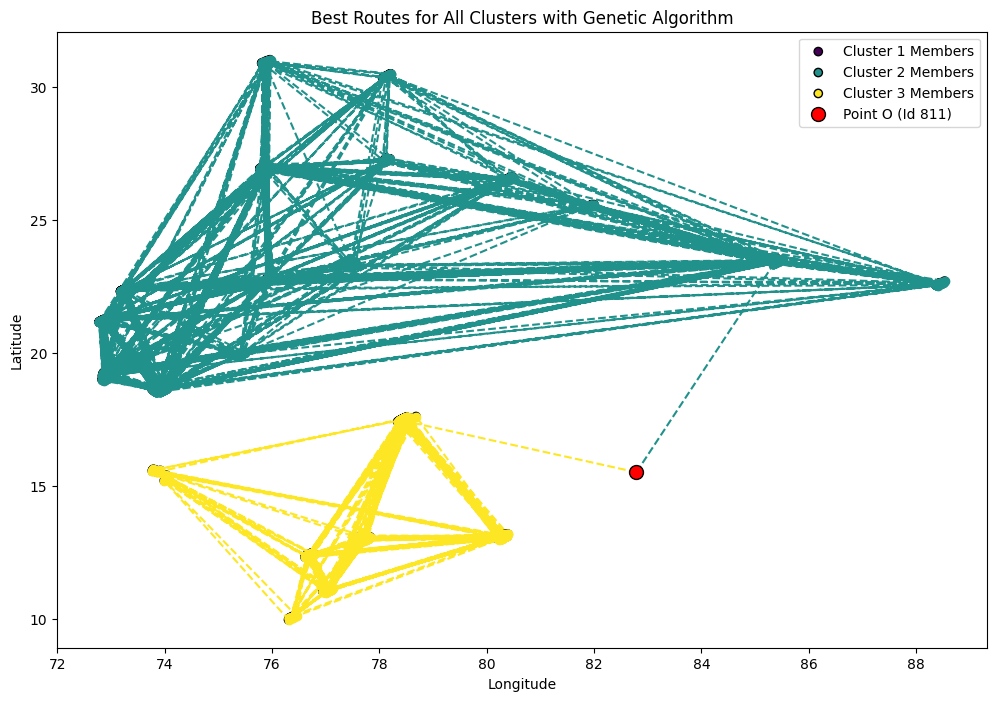

In [ ]:
def create_route(num_points, start_index):
    route = list(range(num_points))
    route.remove(start_index)
    random.shuffle(route)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

def calculate_distance(route, distances_matrix):
    total_distance = sum(distances_matrix[route[i]][route[i + 1]] for i in range(len(route) - 1))
    return total_distance

def mutate(route, mutation_rate=0.01):
    for swapped in range(1, len(route) - 1):
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

def crossover(parent1, parent2):
    start_pos, end_pos = sorted([random.randint(0, len(parent1) - 1) for _ in range(2)])
    child_p1 = parent1[start_pos:end_pos]
    child = [item for item in parent2 if item not in child_p1]
    return child[:start_pos] + child_p1 + child[start_pos:]

def genetic_algorithm(distances_matrix, start_index, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]
        for _ in range(population_size - 10):
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            next_generation.append(mutate(child, mutation_rate))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance


plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(num_clusters):
    cluster_members = data[data['Cluster'] == cluster_label][['Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    print(f"\nCluster {cluster_label + 1}")
    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap(cluster_label / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label + 1} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id {len(points) - 1})', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### Solve TSP for each cluster #5



Cluster 1

Cluster 2


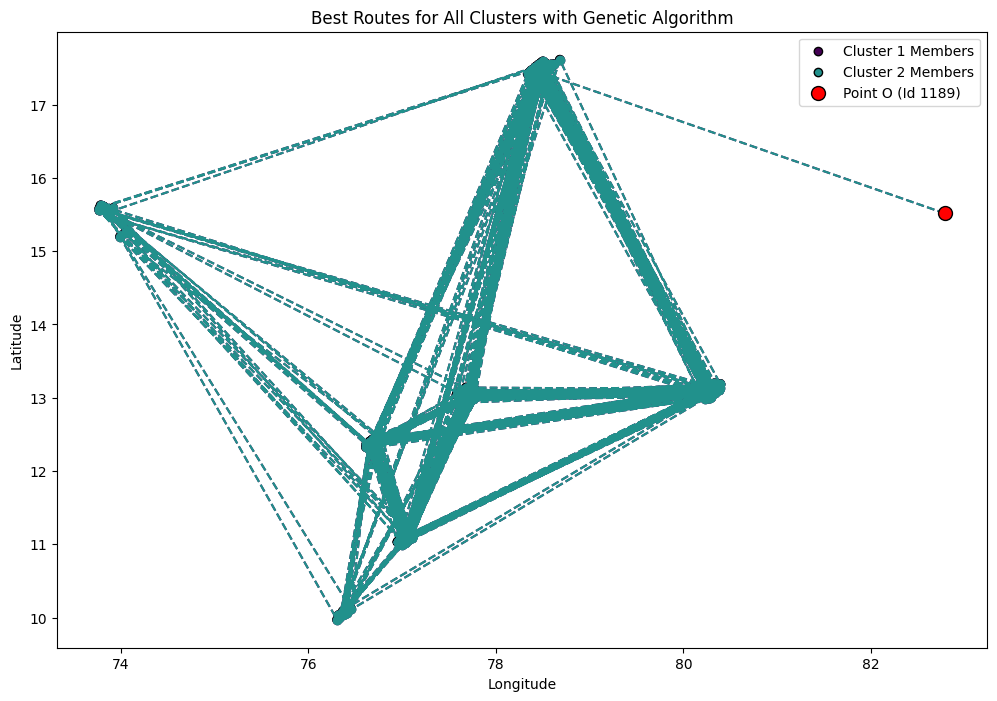

In [ ]:
def create_route(num_points, start_index):
    route = list(range(num_points))
    route.remove(start_index)
    random.shuffle(route)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

def calculate_distance(route, distances_matrix):
    total_distance = sum(distances_matrix[route[i]][route[i + 1]] for i in range(len(route) - 1))
    return total_distance

def mutate(route, mutation_rate=0.01):
    for swapped in range(1, len(route) - 1):
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

def crossover(parent1, parent2):
    start_pos, end_pos = sorted([random.randint(0, len(parent1) - 1) for _ in range(2)])
    child_p1 = parent1[start_pos:end_pos]
    child = [item for item in parent2 if item not in child_p1]
    return child[:start_pos] + child_p1 + child[start_pos:]

def genetic_algorithm(distances_matrix, start_index, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]
        for _ in range(population_size - 10):
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            next_generation.append(mutate(child, mutation_rate))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance



plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(num_clusters):
    cluster_members = data[data['Cluster'] == cluster_label][['Id','Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [2000,start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    # distances_matrix = np.zeros((len(points), len(points)))
    # for i in range(len(points)):
    #     for j in range(len(points)):
    #         distances_matrix[i][j] = euclidean(points[i], points[j])

    # best_route, best_distance = genetic_algorithm(distances_matrix, start_index=2000)

    print(f"\nCluster {cluster_label + 1}")
    # print("Best Route:", best_route)
    # print("Best Distance:", best_distance)

    # route_points = np.array([points[i] for i in best_route])
    color = cmap(cluster_label / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label + 1} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id {len(points) - 1})', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### Solve TSP for each cluster #6



Cluster 1
Best Route: [658, 649, 339, 57, 269, 804, 809, 516, 389, 30, 359, 327, 373, 237, 59, 170, 632, 611, 722, 687, 158, 196, 614, 682, 383, 228, 12, 551, 486, 181, 32, 416, 492, 369, 340, 727, 68, 365, 707, 408, 759, 136, 436, 487, 245, 599, 104, 654, 767, 109, 588, 757, 734, 753, 798, 153, 331, 43, 8, 481, 656, 246, 557, 338, 52, 427, 77, 320, 391, 541, 428, 231, 669, 591, 710, 39, 568, 86, 363, 161, 634, 24, 511, 675, 312, 525, 219, 50, 668, 766, 224, 640, 452, 254, 53, 755, 419, 213, 397, 791, 509, 274, 752, 657, 2, 394, 292, 596, 123, 310, 179, 105, 125, 521, 617, 424, 13, 561, 433, 559, 129, 183, 248, 154, 341, 404, 473, 264, 758, 485, 140, 501, 690, 489, 429, 780, 421, 514, 145, 291, 247, 764, 399, 121, 580, 257, 188, 395, 736, 357, 279, 728, 7, 311, 56, 731, 386, 412, 187, 698, 633, 6, 538, 692, 688, 463, 711, 157, 451, 592, 786, 378, 595, 618, 388, 483, 462, 667, 811, 253, 290, 301, 601, 379, 376, 699, 434, 666, 670, 149, 435, 769, 108, 355, 777, 609, 215, 169, 432, 772, 

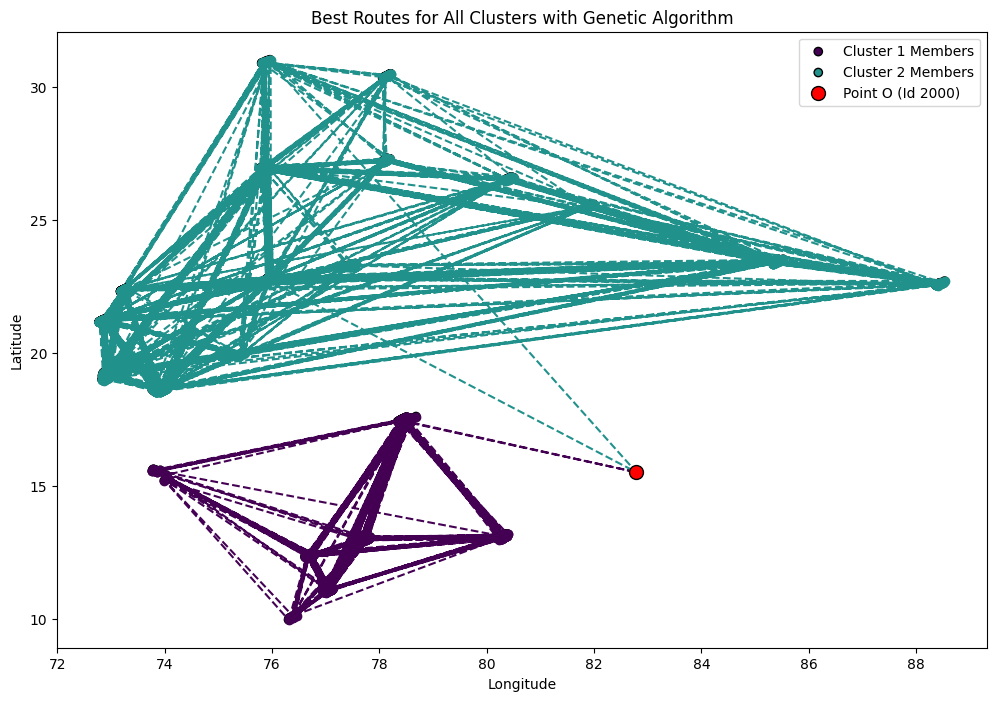

In [ ]:
def create_route(num_points, start_index=0):
    route = list(range(num_points))
    random.shuffle(route)
    route.remove(start_index)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

# Function to calculate distance of a route
def calculate_distance(route, distances_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances_matrix[route[i]][route[i + 1]]
    return total_distance

# Function to mutate a route
def mutate(route, mutation_rate=0.01, start_index=0):
    for swapped in range(1, len(route) - 1):  # Exclude the start/end point
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)  # Exclude the start/end point
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# Function to perform crossover between two parents
def crossover(parent1, parent2, start_index=0):
    start_pos = int(random.random() * len(parent1))
    end_pos = int(random.random() * len(parent1))

    child_p1 = []
    for i in range(min(start_pos, end_pos), max(start_pos, end_pos)):
        child_p1.append(parent1[i])

    child = [item for item in parent2 if item not in child_p1]

    if not child_p1:  # If child_p1 is empty, avoid index error
        return child + [child[0]]

    child_route = child_p1 + child
    child_route.append(child_route[0])  # Ensure the route is a round trip
    return child_route

# Genetic algorithm to find the best route
def genetic_algorithm(distances_matrix, start_index=0, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]  # Elitism
        for _ in range(population_size - 10):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = crossover(parent1, parent2, start_index)
            next_generation.append(mutate(child, mutation_rate, start_index))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance

# Solve TSP for each cluster
plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_label][['Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [start_latitude, start_longitude]  # Add start point to cluster members
    points = cluster_members.values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    print(f"\nCluster {cluster_label}")
    print("Best Route:", best_route)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap((cluster_label - 1) / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id 2000)', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### Solve TSP for each cluster #7



Cluster 1
Best Route IDs: [1.539e+03 1.320e+02 1.000e+00 2.480e+02 7.870e+02 1.251e+03 8.430e+02
 6.530e+02 1.761e+03 6.600e+01 7.700e+01 5.380e+02 1.176e+03 1.320e+03
 6.850e+02 1.947e+03 1.890e+03 7.400e+02 1.090e+03 7.640e+02 1.718e+03
 2.730e+02 1.896e+03 2.000e+00 1.123e+03 1.743e+03 1.673e+03 3.150e+02
 1.579e+03 2.560e+02 1.212e+03 1.664e+03 5.200e+02 3.990e+02 1.711e+03
 4.090e+02 1.403e+03 1.719e+03 1.540e+02 1.448e+03 1.148e+03 1.153e+03
 4.120e+02 3.750e+02 1.365e+03 2.340e+02 1.108e+03 1.608e+03 1.183e+03
 8.300e+02 7.240e+02 1.201e+03 1.199e+03 3.600e+02 1.143e+03 1.450e+03
 1.590e+02 2.300e+02 1.855e+03 1.436e+03 1.097e+03 1.380e+02 1.377e+03
 5.670e+02 4.720e+02 8.060e+02 4.630e+02 7.760e+02 6.860e+02 1.973e+03
 5.120e+02 1.384e+03 2.180e+02 1.370e+02 1.562e+03 1.244e+03 4.910e+02
 9.670e+02 6.300e+01 1.567e+03 7.200e+02 9.980e+02 1.331e+03 1.395e+03
 1.532e+03 1.281e+03 1.504e+03 2.390e+02 1.756e+03 5.980e+02 7.190e+02
 6.940e+02 5.680e+02 7.650e+02 4.230e+02 6.640e+02

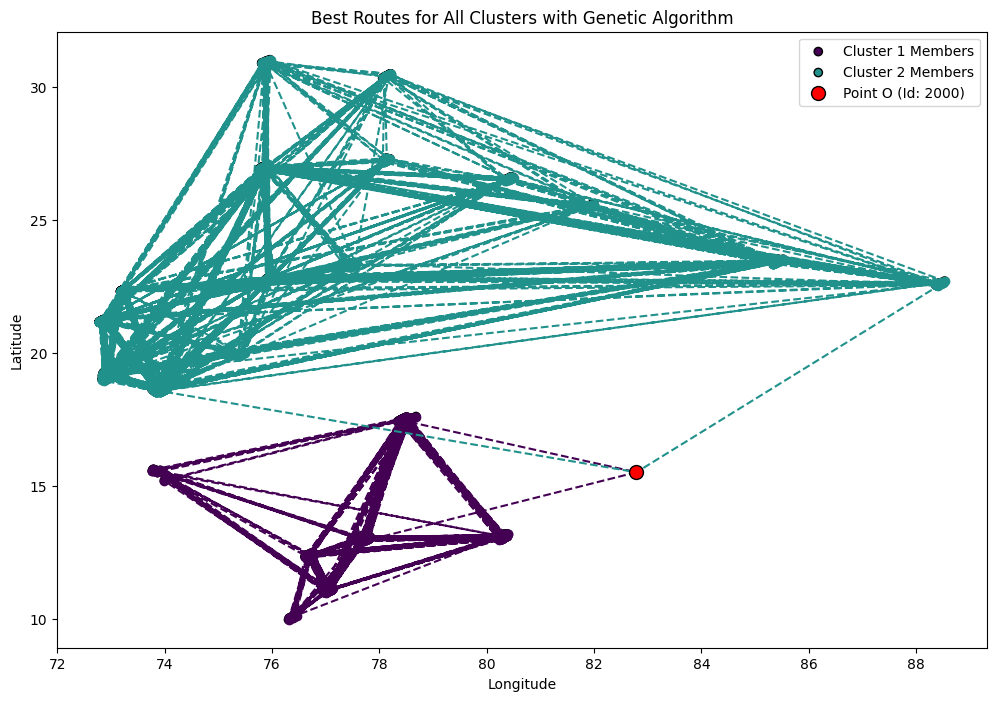

In [ ]:
def create_route(num_points, start_index=0):
    route = list(range(num_points))
    random.shuffle(route)
    route.remove(start_index)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

# Function to calculate distance of a route
def calculate_distance(route, distances_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances_matrix[route[i]][route[i + 1]]
    return total_distance

# Function to mutate a route
def mutate(route, mutation_rate=0.01, start_index=0):
    for swapped in range(1, len(route) - 1):  # Exclude the start/end point
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)  # Exclude the start/end point
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# Function to perform crossover between two parents
def crossover(parent1, parent2, start_index=0):
    start_pos = int(random.random() * len(parent1))
    end_pos = int(random.random() * len(parent1))

    child_p1 = []
    for i in range(min(start_pos, end_pos), max(start_pos, end_pos)):
        child_p1.append(parent1[i])

    child = [item for item in parent2 if item not in child_p1]

    if not child_p1:  # If child_p1 is empty, avoid index error
        return child + [child[0]]

    child_route = child_p1 + child
    child_route.append(child_route[0])  # Ensure the route is a round trip
    return child_route

# Genetic algorithm to find the best route
def genetic_algorithm(distances_matrix, start_index=0, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]  # Elitism
        for _ in range(population_size - 10):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = crossover(parent1, parent2, start_index)
            next_generation.append(mutate(child, mutation_rate, start_index))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance

# Solve TSP for each cluster
plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_label][['Id', 'Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [2000, start_latitude, start_longitude]
    points = cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    best_route_ids = cluster_members.iloc[best_route].Id.values
    print(f"\nCluster {cluster_label}")
    print("Best Route IDs:", best_route_ids)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap((cluster_label - 1) / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id: {len(data["Id"]) - 1})', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

#### Solve TSP for each cluster #8 (WORKS, BUT NOT 2000)


      Id  Delivery_location_latitude  Delivery_location_longitude
0      0                   22.765049                    75.912471
6      6                   23.479746                    85.449820
9      9                   30.397968                    78.116106
11    11                   18.652450                    74.006619
12    12                   30.919584                    75.829346
13    13                   26.593504                    80.502929
14    14                   19.266269                    72.926721
16    16                   18.702718                    73.883572
18    18                   22.582672                    88.382885
19    19                   18.643935                    73.995367
20    20                   23.487804                    85.455146
23    23                   19.261315                    72.902381
25    25                   26.879596                    75.830512
26    26                   21.250522                    72.861477
28    28  

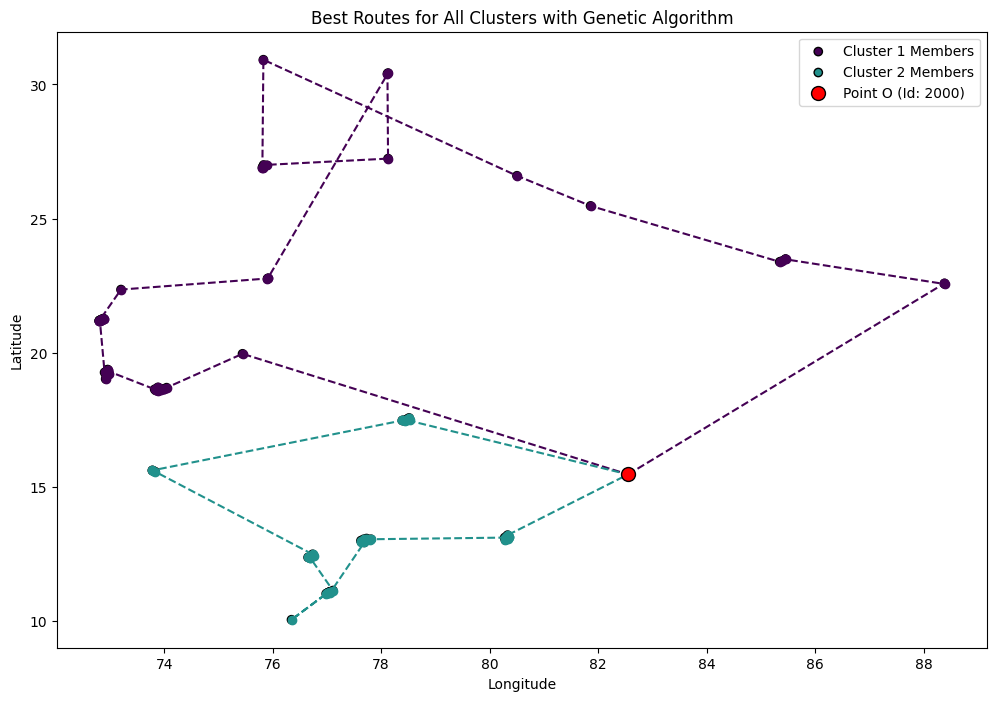

In [ ]:
def create_route(num_points, start_index=0):
    route = list(range(num_points))
    random.shuffle(route)
    route.remove(start_index)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

# Function to calculate distance of a route
def calculate_distance(route, distances_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances_matrix[route[i]][route[i + 1]]
    return total_distance

# Function to mutate a route
def mutate(route, mutation_rate=0.01, start_index=0):
    for swapped in range(1, len(route) - 1):  # Exclude the start/end point
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)  # Exclude the start/end point
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# Function to perform crossover between two parents
def crossover(parent1, parent2, start_index=0):
    start_pos = int(random.random() * len(parent1))
    end_pos = int(random.random() * len(parent1))

    child_p1 = []
    for i in range(min(start_pos, end_pos), max(start_pos, end_pos)):
        child_p1.append(parent1[i])

    child = [item for item in parent2 if item not in child_p1]

    if not child_p1:  # If child_p1 is empty, avoid index error
        return child + [child[0]]

    child_route = child_p1 + child
    child_route.append(child_route[0])  # Ensure the route is a round trip
    return child_route

# Genetic algorithm to find the best route
def genetic_algorithm(distances_matrix, start_index=0, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]  # Elitism
        for _ in range(population_size - 10):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = crossover(parent1, parent2, start_index)
            next_generation.append(mutate(child, mutation_rate, start_index))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance

# Solve TSP for each cluster
plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_label][['Id', 'Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [2000, start_latitude, start_longitude]
    # cluster_members = cluster_members.append({'Id': 2000, 'Delivery_location_latitude': start_latitude, 'Delivery_location_longitude': start_longitude}, ignore_index=True)
    cluster_members['Id'] = cluster_members['Id'].astype(int)
    print(cluster_members)
    points = cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])


    start_index = len(points) - 1
    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)
    best_route_ids = cluster_members.iloc[best_route].Id.values
    print(f"\nCluster {cluster_label}")
    print("Best Route IDs:", best_route_ids)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap((cluster_label - 1) / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id: 2000)', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### Solve TSP for each cluster #9


Cluster 1
Best Route IDs: [  60   76   16   90   33   11   34   28   19   78   94   83    0   56
   55   74   25   84   12   62    9   54   82   13   61    6   20   18
   44   49   81 2000   70   26   52   42   85   64   36   98   48   30
   65   58   73   59   43   87   96   14   92   45   23   41   35   60]
Best Distance: 59.428067128507394

Cluster 2
Best Route IDs: [   2   69   27   46   39   95   50    1   71   38   31   77   32   75
   37    5   17   91    8   80   67 2000   72   68    4   63   24   22
   40   47   99    3   88   51   29   53   93   21   10   86   89    7
   97   15   57   66   79    2    2]
Best Distance: 27.727414727062243


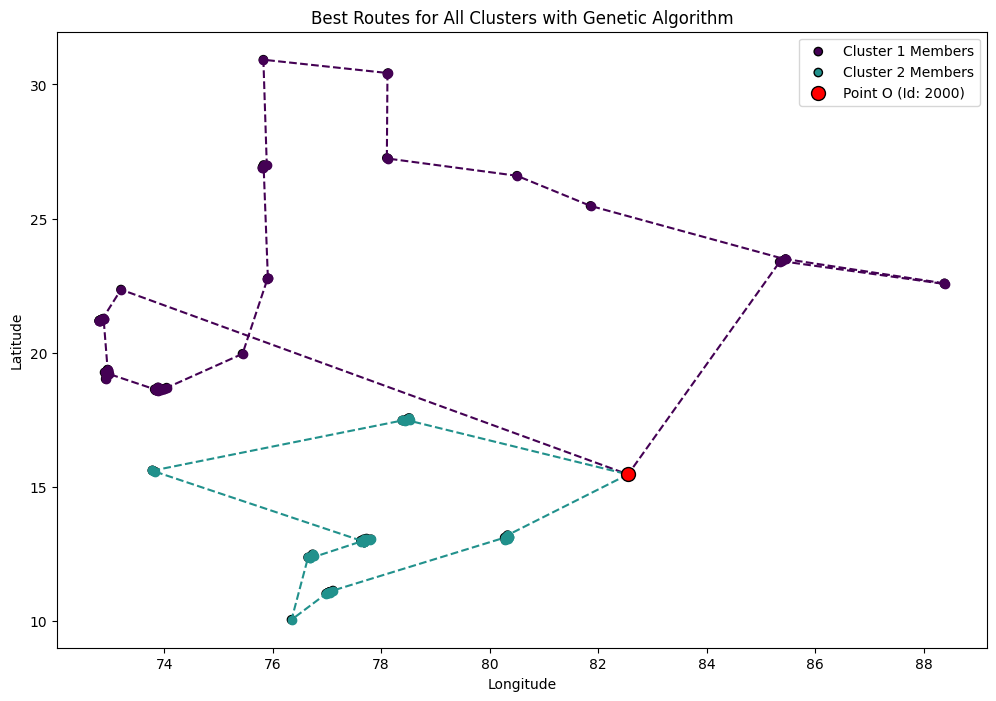

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import euclidean

# Function to create a random route
def create_route(num_points, start_index=0):
    route = list(range(num_points))
    random.shuffle(route)
    route.remove(start_index)
    route.insert(0, start_index)
    route.append(start_index)  # Ensure the route is a round trip
    return route

# Function to calculate distance of a route
def calculate_distance(route, distances_matrix):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances_matrix[route[i]][route[i + 1]]
    return total_distance

# Function to mutate a route
def mutate(route, mutation_rate=0.01, start_index=0):
    for swapped in range(1, len(route) - 1):  # Exclude the start/end point
        if random.random() < mutation_rate:
            swap_with = random.randint(1, len(route) - 2)  # Exclude the start/end point
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

# Function to perform crossover between two parents
def crossover(parent1, parent2, start_index=0):
    start_pos = int(random.random() * len(parent1))
    end_pos = int(random.random() * len(parent1))

    child_p1 = []
    for i in range(min(start_pos, end_pos), max(start_pos, end_pos)):
        child_p1.append(parent1[i])

    child = [item for item in parent2 if item not in child_p1]

    if not child_p1:  # If child_p1 is empty, avoid index error
        return child + [child[0]]

    child_route = child_p1 + child
    child_route.append(child_route[0])  # Ensure the route is a round trip
    return child_route

# Genetic algorithm to find the best route
def genetic_algorithm(distances_matrix, start_index=0, num_generations=500, population_size=100, mutation_rate=0.01):
    num_points = len(distances_matrix)
    population = [create_route(num_points, start_index) for _ in range(population_size)]

    for _ in range(num_generations):
        population = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))
        next_generation = population[:10]  # Elitism
        for _ in range(population_size - 10):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = crossover(parent1, parent2, start_index)
            next_generation.append(mutate(child, mutation_rate, start_index))
        population = next_generation

    best_route = sorted(population, key=lambda route: calculate_distance(route, distances_matrix))[0]
    best_distance = calculate_distance(best_route, distances_matrix)
    return best_route, best_distance

# Solve TSP for each cluster
plt.figure(figsize=(12, 8))
cmap = cm.viridis
new_row = pd.DataFrame({'Id': [2000], 'Delivery_location_latitude': [start_latitude], 'Delivery_location_longitude': [start_longitude]})

for cluster_label in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_label][['Id', 'Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members = pd.concat([cluster_members, new_row], ignore_index=True)  # Append new row and reset index
    cluster_members['Id'] = cluster_members['Id'].astype(int)  # Ensure IDs are integers
    # print(cluster_members)
    points = cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    start_index = cluster_members[cluster_members['Id'] == 2000].index[0]
    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=start_index)
    best_route_ids = cluster_members.iloc[best_route].Id.values
    print(f"\nCluster {cluster_label}")
    print("Best Route IDs:", best_route_ids)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap((cluster_label - 1) / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id: 2000)', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



Cluster 1
Best Route IDs: [2000    2    1 2000]
Best Distance: 4.404543109109048

Cluster 2
Best Route IDs: [2000    3 2000]
Best Distance: 5.656854249492381

Cluster 3
Best Route IDs: [   6 2000    5    6]
Best Distance: 15.593592046148256


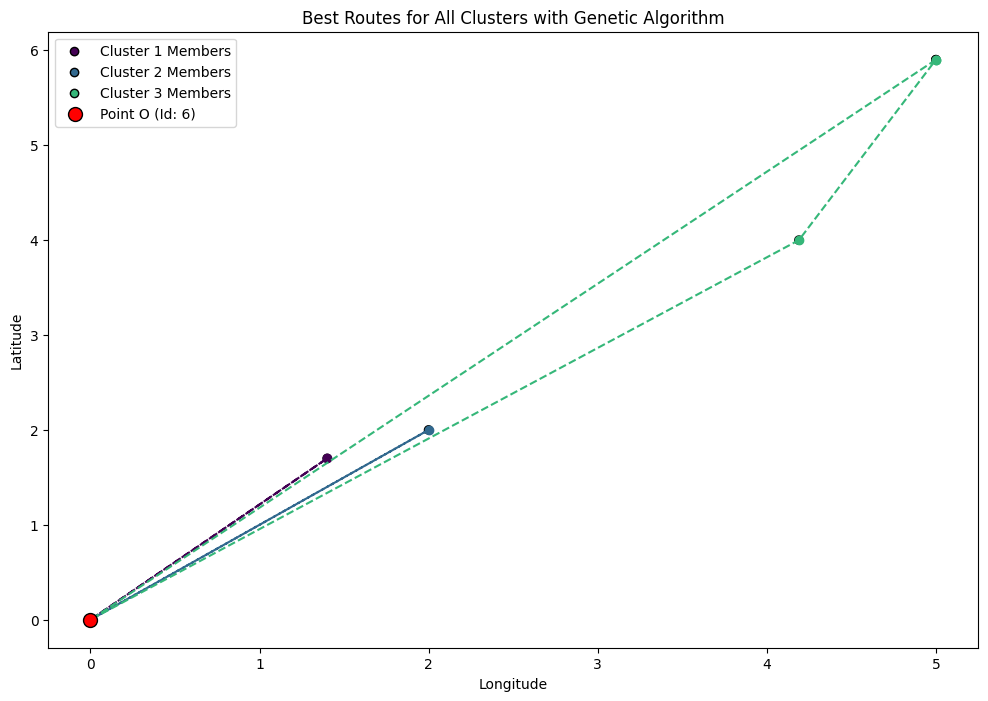

In [ ]:

# Example data
data = pd.DataFrame({
    'Id': [1, 2, 3, 4, 5, 6],
    'Cluster': [1, 1, 2, 3, 3, 3],
    'Delivery_location_latitude': [0, 1.7, 2, 3, 4, 5.901],
    'Delivery_location_longitude': [0, 1.4, 2, 3, 4.19, 5]
})

start_latitude = 0
start_longitude = 0
num_clusters = 3

plt.figure(figsize=(12, 8))
cmap = cm.viridis

for cluster_label in range(1, num_clusters + 1):
    cluster_members = data[data['Cluster'] == cluster_label][['Id', 'Delivery_location_latitude', 'Delivery_location_longitude']]
    cluster_members.loc[len(cluster_members)] = [2000, start_latitude, start_longitude]  # Add start point to cluster members with ID 2000
    points = cluster_members[['Delivery_location_latitude', 'Delivery_location_longitude']].values

    distances_matrix = np.zeros((len(points), len(points)))
    for i in range(len(points)):
        for j in range(len(points)):
            distances_matrix[i][j] = euclidean(points[i], points[j])

    best_route, best_distance = genetic_algorithm(distances_matrix, start_index=len(points) - 1)

    best_route_ids = cluster_members.iloc[best_route].Id.values
    print(f"\nCluster {cluster_label}")
    print("Best Route IDs:", best_route_ids)
    print("Best Distance:", best_distance)

    route_points = np.array([points[i] for i in best_route])
    color = cmap((cluster_label - 1) / num_clusters)
    plt.plot(route_points[:, 1], route_points[:, 0], 'o--', color=color)
    plt.scatter(route_points[:, 1], route_points[:, 0], c=[color]*len(route_points), edgecolors='black', label=f'Cluster {cluster_label} Members')

# Plot Start Point
plt.scatter(start_longitude, start_latitude, c='red', label=f'Point O (Id: {data["Id"].iloc[-1]})', edgecolors='black', s=100, zorder=5)
plt.title("Best Routes for All Clusters with Genetic Algorithm")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
best_route_ids = points
print(best_route_ids)

[[0.    0.   ]
 [4.    4.19 ]
 [5.901 5.   ]]


# Implementation Algorithm (MTSP)

## Genetic Algo